# Predicting Coronary Heart Disease Non-Invasively

## Table of Contents
* [Context](#context)
* [Read and Preprocess Data](#preprocess)
* [Out of the Box Model Comparisons: Logistic Regression, SVC, Decision Tree and Random Forest](#learning_curves)
* [Feature Selection](#feature_selection)
* [Hyperparameter Tuning with Cross-Validation](#validation_curves)
* [Model Validation on Hold-Out Data](#validation)
* [Comparison of Feature Importances by Model](#feature_importances)
    * [Decision Tree](#decision_tree)
    * [Logistic Regression](#logistic_regression)
    * [Random Forest](#random_forest)
    * [SVC](#svc)
* [Visualization of Decision Regions](#decision_regions)
* [Conclusion](#conclusion)


## Context <a id = 'context'></a>

Coronary heart disease (CHD) involves the reduction of blood flow to the heart muscle due to build-up of plaque in the arteries of the heart. It is the most common form of cardiovascular disease. Currently, invasive coronary angiography represents the gold standard for establishing the presence, location, and severity of CAD, however this diagnostic method is costly and associated with morbidity and mortality in CAD patients. Therefore, it would be beneficial to develop a non-invasive alternative to replace the current gold standard. 

Other less invasive diagnostics methods have been proposed in the scientific literature including exercise electrocardiogram, thallium scintigraphy and fluoroscopy of coronary calcification. However the diagnostic accuracy of these tests only ranges between 35%-75%. Therefore, it would be beneficial to develop a computer aided diagnostic tool that could utilize the combined results of these non-invasive tests in conjunction with other patient attributes to boost the diagnostic power of these non-invasive methods with the aim ultimately replacing the current invasive gold standard.

In this vein, the following dataset comprises 303 observations, 13 features and 1 target attribute. The 13 features include the results of the aforementioned non-invasive diagnostic tests along with other relevant patient information. The target variable includes the result of the invasive coronary angiogram which represents the presence or absence of coronary artery disease in the patient with 0 representing absence of CHD and labels 1-4 representing presence of CHD. Therefore, the task at hand is to predict the result of the invasive coronary angiography, the current gold standard, using the results of the aforementioned non-invasive tests and patient information. 

The data was originally collected by Robert Detrano, M.D., Ph.D of the Cleveland Clinic Foundation. 



## Read and Preprocess Data: <a id = 'preprocess'></a>

Data is read from csv and dummy variables are create for all non-binary categorical data.

In [1]:
import pandas as pd
import numpy as np

hd = pd.read_csv('processed_cleveland.csv', na_values = '?')
hd['cp'].replace({1:'typical_angina', 2:'atypical_angina', 3: 'non-anginal_pain', 4: 'asymptomatic'}, inplace = True)
hd['restecg'].replace({0:'normal', 1:' ST-T_wave_abnormality', 2:'left_ventricular_hypertrophy'}, inplace = True)
hd['slope'].replace({1:'upsloping', 2:'flat', 3:'downsloping'}, inplace = True)
hd['thal'].replace({3:'normal', 6:'fixed_defect', 7:'reversible_defect'}, inplace = True)
hd['num'].replace({2:1, 3:1, 4:1}, inplace = True)

hd.dropna(how = 'any', inplace = True)

features = hd.columns.to_list()
categorical_features = ['cp', 'thal', 'restecg', 'slope']
categorical_features = pd.get_dummies(hd[categorical_features].applymap(str))
features.remove('num')

features.remove('cp')
features.remove('thal')
features.remove('restecg')
features.remove('slope')

y = hd['num']
y.columns = ['target']
X = pd.concat([hd[features],categorical_features], axis = 1)
X.drop([92, 138, 163, 164, 251])
X.head()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_22384\327893864.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  categorical_features = pd.get_dummies(hd[categorical_features].applymap(str))


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_asymptomatic,...,cp_typical_angina,thal_fixed_defect,thal_normal,thal_reversible_defect,restecg_ ST-T_wave_abnormality,restecg_left_ventricular_hypertrophy,restecg_normal,slope_downsloping,slope_flat,slope_upsloping
0,63,1,145,233,1,150,0,2.3,0.0,False,...,True,True,False,False,False,True,False,True,False,False
1,67,1,160,286,0,108,1,1.5,3.0,True,...,False,False,True,False,False,True,False,False,True,False
2,67,1,120,229,0,129,1,2.6,2.0,True,...,False,False,False,True,False,True,False,False,True,False
3,37,1,130,250,0,187,0,3.5,0.0,False,...,False,False,True,False,False,False,True,True,False,False
4,41,0,130,204,0,172,0,1.4,0.0,False,...,False,False,True,False,False,True,False,False,False,True


## Out of the Box Model Comparisons: Logistic Regression, SVC, Decision Tree and Random Forest <a id = 'learning_curves'></a>


Learning curves are plotted for four out-of-the-box models. The curves give an idea of whether the models would benefit from additional data, whether the models are overfitting or underfitting the data, and of baseline model peformance. Training accuracies are plotted in red and valdiation accuracies are plotted in blue. 

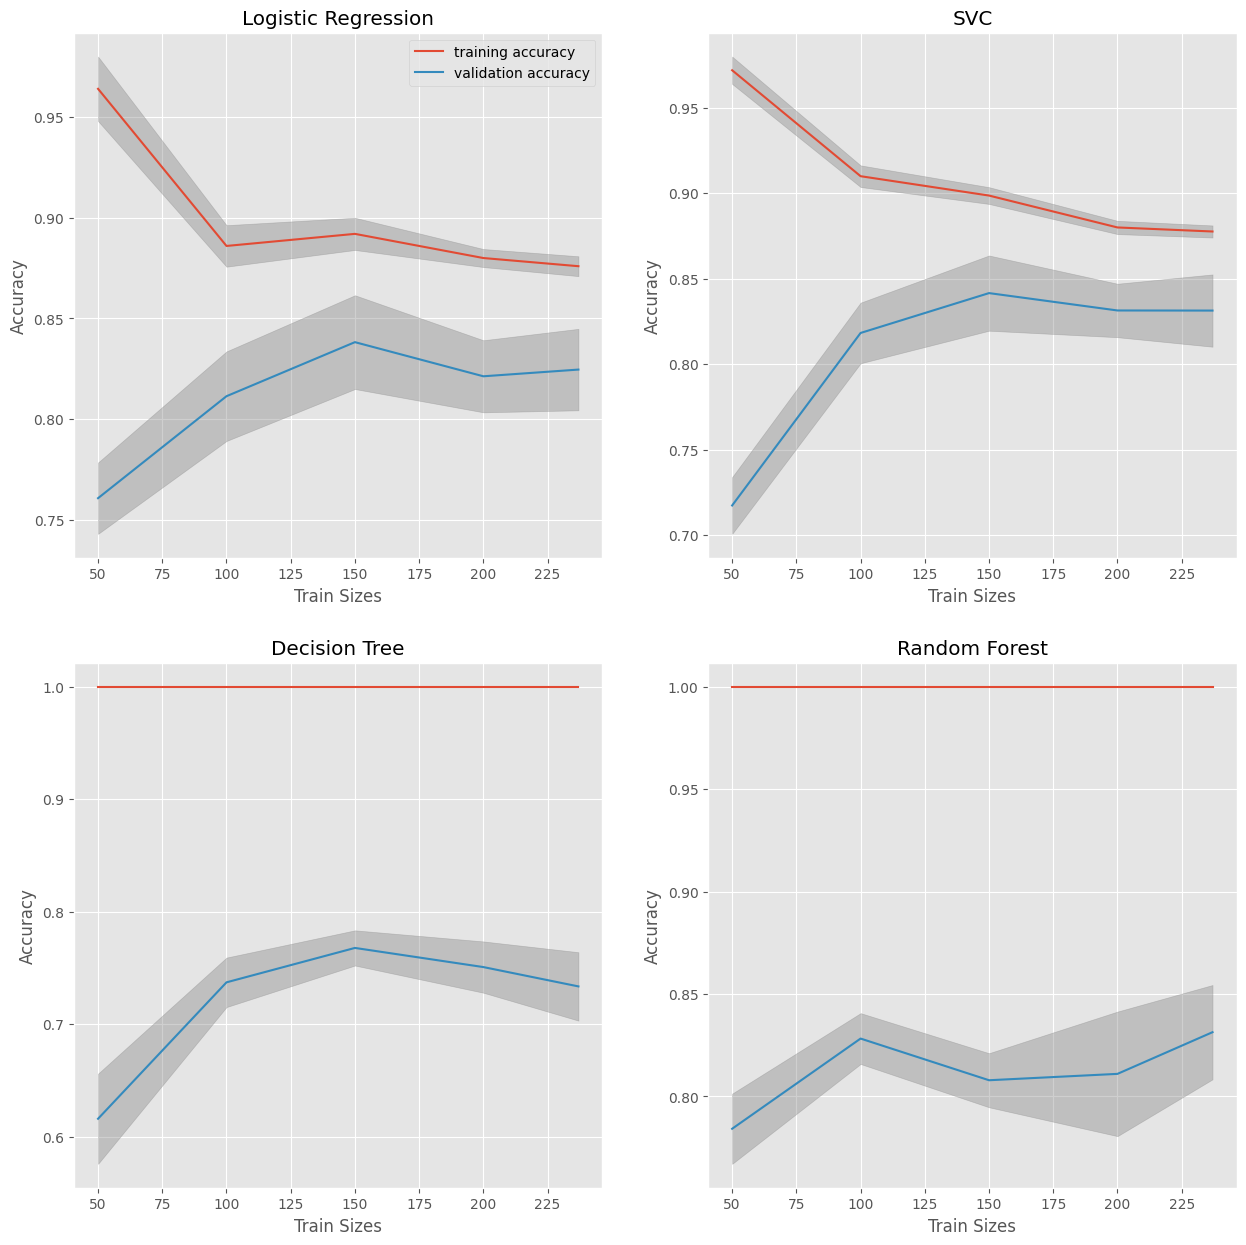

In [3]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
train_sizes, train_scores_lr, valid_scores_lr = learning_curve( LogisticRegression(), X_scaled, y, train_sizes=[50, 100, 150, 200, 237], cv=5)
train_sizes, train_scores_svc, valid_scores_svc = learning_curve( SVC(kernel = 'linear'), X_scaled, y, train_sizes=[50, 100, 150, 200, 237], cv=5)
train_sizes, train_scores_dt, valid_scores_dt = learning_curve( DecisionTreeClassifier(), X_scaled, y, train_sizes=[50, 100, 150, 200, 237], cv=5)
train_sizes, train_scores_rf, valid_scores_rf = learning_curve( RandomForestClassifier(), scaler.fit_transform(X), y, train_sizes=[50, 100, 150, 200, 237], cv=5)


plt.style.use('ggplot')

fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(15, 15))

ax.plot(train_sizes, np.mean(train_scores_lr, axis = 1), label = 'training accuracy')
ax.fill_between(train_sizes, np.mean(train_scores_lr, axis = 1) + np.std(train_scores_lr, axis = 1)/2, np.mean(train_scores_lr, axis = 1) - np.std(train_scores_lr, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax.plot(train_sizes, np.mean(valid_scores_lr, axis = 1), label = 'validation accuracy')
ax.fill_between(train_sizes, np.mean(valid_scores_lr, axis = 1) + np.std(valid_scores_lr, axis = 1)/2, np.mean(valid_scores_lr, axis = 1) - np.std(valid_scores_lr, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Train Sizes')
ax.set_title('Logistic Regression')
ax.legend(loc = 'upper right')


ax1.plot(train_sizes, np.mean(train_scores_svc, axis = 1), label = 'training accuracy')
ax1.fill_between(train_sizes, np.mean(train_scores_svc, axis = 1) + np.std(train_scores_svc, axis = 1)/2, np.mean(train_scores_svc, axis = 1) - np.std(train_scores_svc, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax1.plot(train_sizes, np.mean(valid_scores_svc, axis = 1), label = 'validation accuracy')
ax1.fill_between(train_sizes, np.mean(valid_scores_svc, axis = 1) + np.std(valid_scores_svc, axis = 1)/2, np.mean(valid_scores_svc, axis = 1) - np.std(valid_scores_svc, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)


ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Train Sizes')
ax1.set_title('SVC')

ax2.plot(train_sizes, np.mean(train_scores_dt, axis = 1), label = 'training accuracy')
ax2.fill_between(train_sizes, np.mean(train_scores_dt, axis = 1) + np.std(train_scores_dt, axis = 1)/2, np.mean(train_scores_dt, axis = 1) - np.std(train_scores_dt, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax2.plot(train_sizes, np.mean(valid_scores_dt, axis = 1), label = 'validation accuracy')
ax2.fill_between(train_sizes, np.mean(valid_scores_dt, axis = 1) + np.std(valid_scores_dt, axis = 1)/2, np.mean(valid_scores_dt, axis = 1) - np.std(valid_scores_dt, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)


ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Train Sizes')
ax2.set_title('Decision Tree')

ax3.plot(train_sizes, np.mean(train_scores_rf, axis = 1), label = 'training accuracy')
ax3.fill_between(train_sizes, np.mean(train_scores_rf, axis = 1) + np.std(train_scores_rf, axis = 1)/2, np.mean(train_scores_rf, axis = 1) - np.std(train_scores_rf, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax3.plot(train_sizes, np.mean(valid_scores_rf, axis = 1), label = 'validation accuracy')
ax3.fill_between(train_sizes, np.mean(valid_scores_rf, axis = 1) + np.std(valid_scores_rf, axis = 1)/2, np.mean(valid_scores_rf, axis = 1) - np.std(valid_scores_rf, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)


ax3.set_ylabel('Accuracy')
ax3.set_xlabel('Train Sizes')
ax3.set_title('Random Forest')


plt.show()

## Feature Selection <a id = 'feature_selection'></a>

The data is split into training and test sets. Lasso Regression is combined with recursive feature selection methods using Random Forest and GradientBoosting models to reduce the dataset to include only the most important features. Only features deemed important by all three methods were maintained in the reduced dataset, which reduces the number of utilized features from 22 to 15, as shown below. A random seed of 1 is in the train test split to ensure reproducibility. 

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 1)
corr_df = X_train.corr().abs()
mask = np.triu((np.ones_like(corr_df, dtype = bool)))
tri_df = corr_df.mask(mask)


to_drop = []

for index, row in tri_df.iterrows():
    for col in row.index:
        if tri_df.loc[index, col]>.9:
            to_drop.append((index, col))


to_drop = [val[0] for val in to_drop]
X_train = X_train.drop(to_drop, axis = 1)
X_test = X_test.drop(to_drop, axis = 1)
reduced_X =  X.drop(to_drop, axis = 1)

scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train))
X_train_std.columns = X_train.columns

X_test_std = pd.DataFrame(scaler.transform(X_test))
X_test_std.columns = X_test.columns

kf = KFold(n_splits = 5, random_state = 1, shuffle = True)


lcv = LassoCV(cv = kf)
lcv.fit(X_train_std, y_train)
lcv_mask = lcv.coef_ != 0

rfe_rf = RFE(estimator = RandomForestClassifier(),n_features_to_select = sum(lcv_mask), step = 1)
rfe_rf.fit(X_train_std, y_train)
rf_mask = rfe_rf.support_

rfe_gb = RFE(estimator = GradientBoostingRegressor(), n_features_to_select =sum(lcv_mask), step = 1)
rfe_gb.fit(X_train_std, y_train)
gb_mask = rfe_gb.support_

votes = np.sum([lcv_mask, rf_mask, gb_mask], axis = 0)

mask  = votes > 2


X_train = X_train.loc[:, mask]
X_test = X_test.loc[:, mask]
X_train_std = X_train_std.loc[:, mask]
X_test_std = X_test_std.loc[:, mask]



lassopd = pd.DataFrame([int(i) for i in lcv_mask ], index = reduced_X.columns, columns = ['Lasso']).loc[lcv_mask, :]
rfpd = pd.DataFrame([int(i) for i in rf_mask ], index = reduced_X.columns, columns = ['RandomForest']).loc[rf_mask, :]
gbpd =  pd.DataFrame([int(i) for i in gb_mask ], index = reduced_X.columns, columns = ['GradientBoosting']).loc[gb_mask, :]

votepd = pd.DataFrame(votes, index = reduced_X.columns, columns = ['tally']).loc[votes>0, :]


reduced_X = reduced_X.loc[:, mask]
pd.concat([lassopd, rfpd, gbpd, votepd], axis = 1, sort = True).fillna(0).sort_values(by='tally', ascending = False)



,Lasso,RandomForest,GradientBoosting,tally
trestbps,1.0,1.0,1.0,3
slope_upsloping,1.0,1.0,1.0,3
chol,1.0,1.0,1.0,3
cp_asymptomatic,1.0,1.0,1.0,3
thalach,1.0,1.0,1.0,3
cp_non-anginal_pain,1.0,1.0,1.0,3
cp_typical_angina,1.0,1.0,1.0,3
exang,1.0,1.0,1.0,3
thal_reversible_defect,1.0,1.0,1.0,3
oldpeak,1.0,1.0,1.0,3


## Hyperparameter Tuning with Cross-Validation <a id = 'validation_curves'></a>

Validation curves are plotted to determine the optimal hyperparameters for the different models. Optimal hyperparameters are those that optimize valitation scores while reducing the degree of model overfitting as determined by the differences between training scores (red) and validation scores (blue).   

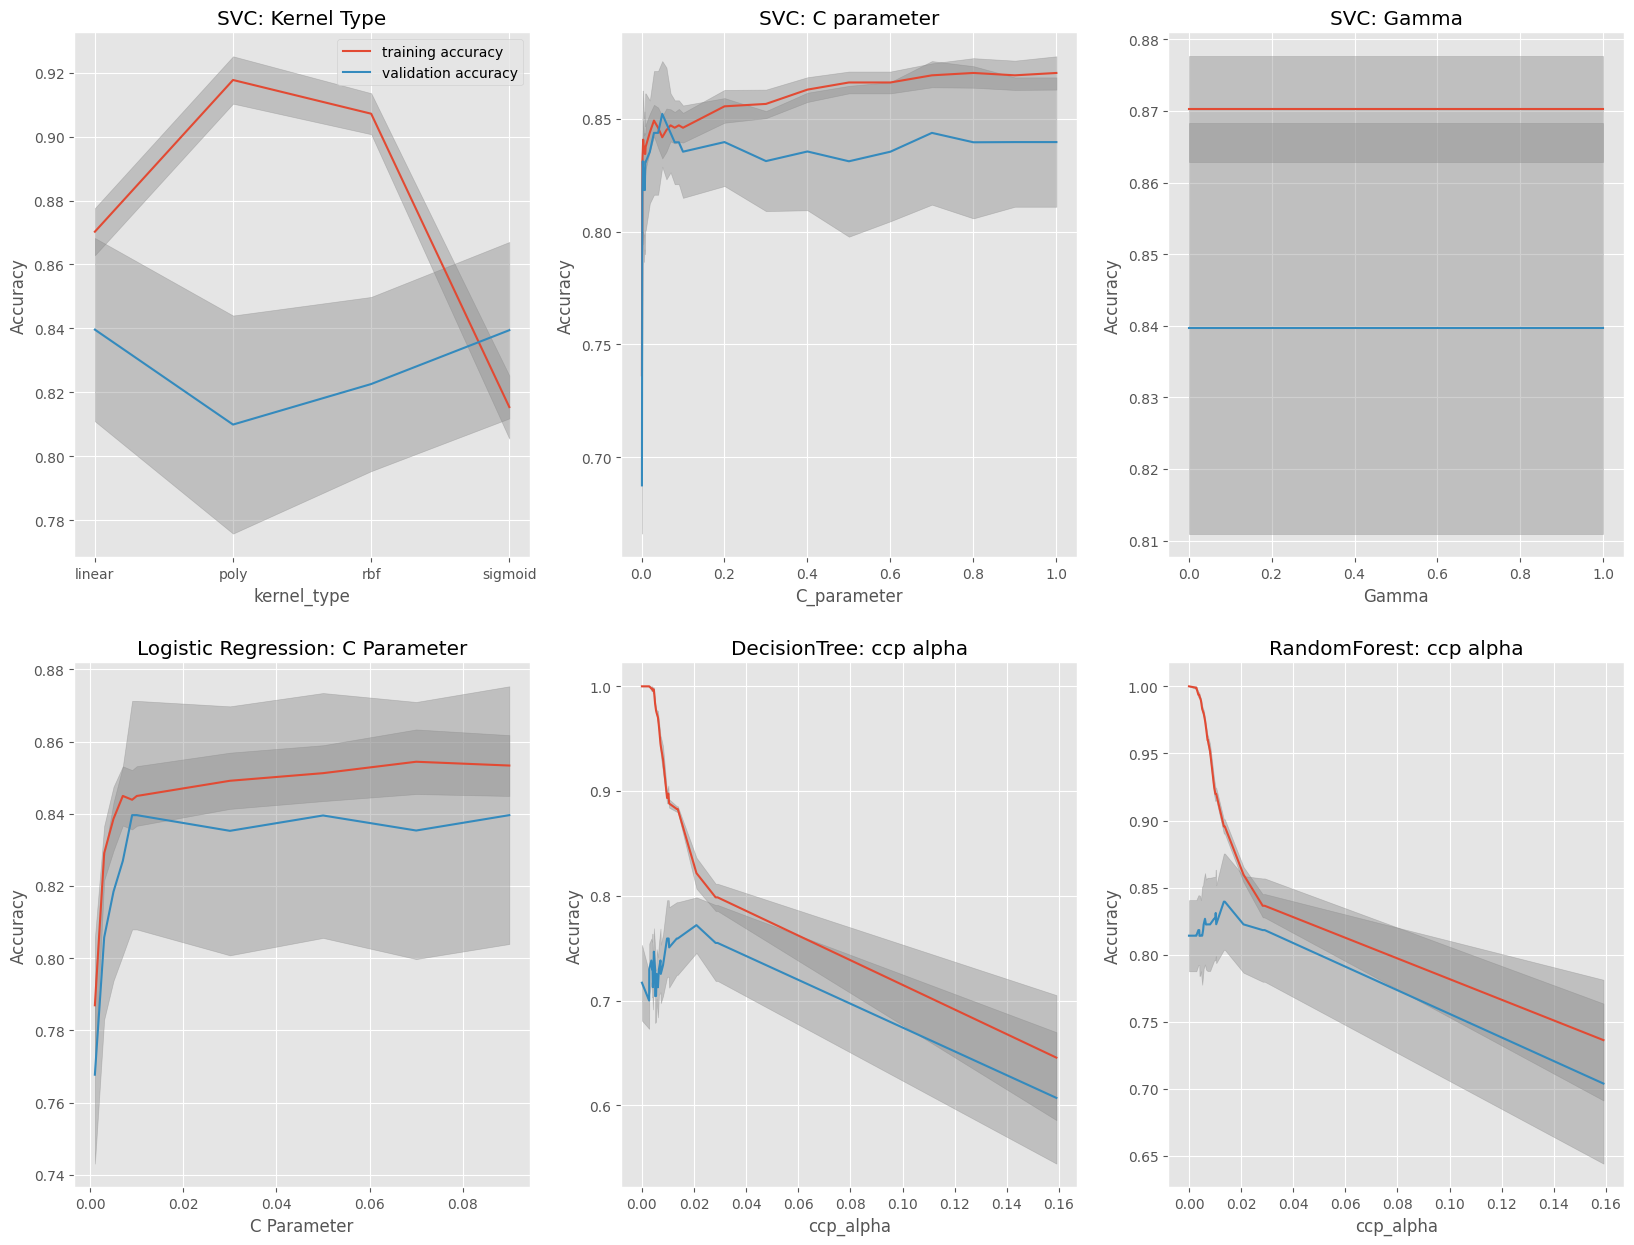

In [12]:
from sklearn.model_selection import validation_curve




plt.style.use('ggplot')

fig, ((ax, ax1, ax2), (ax3, ax4, ax5) ) = plt.subplots(2, 3, figsize=(20, 15))



kernels = ['linear','poly', 'rbf', 'sigmoid']
train_scores, valid_scores = validation_curve(SVC(), X_train_std, y_train, param_name="kernel", param_range=kernels, cv=kf)
ax.plot(kernels, np.mean(train_scores, axis = 1), label = 'training accuracy')
ax.fill_between(kernels, np.mean(train_scores, axis = 1) + np.std(train_scores, axis = 1)/2, np.mean(train_scores, axis = 1) - np.std(train_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax.plot(kernels, np.mean(valid_scores, axis = 1), label = 'validation accuracy')
ax.fill_between(kernels, np.mean(valid_scores, axis = 1) + np.std(valid_scores, axis = 1)/2, np.mean(valid_scores, axis = 1) - np.std(valid_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax.legend(loc = 'upper right')
ax.set_ylabel('Accuracy')
ax.set_xlabel('kernel_type')
ax.set_title('SVC: Kernel Type')

a1 = np.logspace(-3, -1, 3)
a2 = np.arange(1,11,1)

C_param_range = np.outer(a1, a2).flatten()


train_scores, valid_scores = validation_curve(SVC(kernel='linear'), X_train_std, y_train, param_name="C", param_range=C_param_range, cv=kf)
ax1.plot(C_param_range, np.mean(train_scores, axis = 1), label = 'training accuracy')
ax1.fill_between(C_param_range, np.mean(train_scores, axis = 1) + np.std(train_scores, axis = 1)/2, np.mean(train_scores, axis = 1) - np.std(train_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax1.plot(C_param_range, np.mean(valid_scores, axis = 1), label = 'validation accuracy')
ax1.fill_between(C_param_range, np.mean(valid_scores, axis = 1) + np.std(valid_scores, axis = 1)/2, np.mean(valid_scores, axis = 1) - np.std(valid_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('C_parameter')
ax1.set_title('SVC: C parameter')

index = np.where((np.mean(valid_scores, axis = 1) == max(np.mean(valid_scores, axis = 1))))[0][0]
c_svc = C_param_range[index]

a1 = np.logspace(-3, -1, 3)
a2 = np.arange(1,11,1)
gammas = np.outer(a1, a2).flatten()

train_scores, valid_scores = validation_curve(SVC(kernel = 'linear'), X_train_std, y_train, param_name="gamma",param_range=gammas, cv = kf)
ax2.plot(gammas, np.mean(train_scores, axis = 1), label = 'training accuracy')
ax2.fill_between(gammas, np.mean(train_scores, axis = 1) + np.std(train_scores, axis = 1)/2, np.mean(train_scores, axis = 1) - np.std(train_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax2.plot(gammas, np.mean(valid_scores, axis = 1), label = 'validation accuracy')
ax2.fill_between(gammas, np.mean(valid_scores, axis = 1) + np.std(valid_scores, axis = 1)/2, np.mean(valid_scores, axis = 1) - np.std(valid_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Gamma')
ax2.set_title('SVC: Gamma')

index = np.where((np.mean(valid_scores, axis = 1) == max(np.mean(valid_scores, axis = 1))))[0][0]
g_svc =gammas[index]


a1 = np.logspace(-3, -2, 2)
a2 = np.arange(1,11,2)

C_param_range = np.outer(a1, a2).flatten()
train_scores, valid_scores = validation_curve(LogisticRegression(), X_train_std, y_train, param_name="C",param_range=C_param_range, cv= kf)
ax3.plot(C_param_range, np.mean(train_scores, axis = 1), label = 'training accuracy')
ax3.fill_between(C_param_range, np.mean(train_scores, axis = 1) + np.std(train_scores, axis = 1)/2, np.mean(train_scores, axis = 1) - np.std(train_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax3.plot(C_param_range, np.mean(valid_scores, axis = 1), label = 'validation accuracy')
ax3.fill_between(C_param_range, np.mean(valid_scores, axis = 1) + np.std(valid_scores, axis = 1)/2, np.mean(valid_scores, axis = 1) - np.std(valid_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax3.set_title('Logistic Regression: C Parameter')
ax3.set_ylabel('Accuracy')
ax3.set_xlabel('C Parameter')

index = np.where((np.mean(valid_scores, axis = 1) == max(np.mean(valid_scores, axis = 1))))[0][0]
lr_c =C_param_range[index]

tree = DecisionTreeClassifier()
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name="ccp_alpha",param_range=ccp_alphas, cv=kf)

ax4.plot(ccp_alphas, np.mean(train_scores, axis = 1), label = 'training accuracy')
ax4.fill_between(ccp_alphas, np.mean(train_scores, axis = 1) + np.std(train_scores, axis = 1)/2, np.mean(train_scores, axis = 1) - np.std(train_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax4.plot(ccp_alphas, np.mean(valid_scores, axis = 1), label = 'validation accuracy')
ax4.fill_between(ccp_alphas, np.mean(valid_scores, axis = 1) + np.std(valid_scores, axis = 1)/2, np.mean(valid_scores, axis = 1) - np.std(valid_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax4.set_title('DecisionTree: ccp alpha')
ax4.set_ylabel('Accuracy')
ax4.set_xlabel('ccp_alpha')

index = np.where((np.mean(valid_scores, axis = 1) == max(np.mean(valid_scores, axis = 1))))[0][0]
ccp_alpha_dt = ccp_alphas[index]


tree = DecisionTreeClassifier()
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state = 10), X_train, y_train, param_name="ccp_alpha",param_range=ccp_alphas, cv=kf)

index = np.where((np.mean(valid_scores, axis = 1) == max(np.mean(valid_scores, axis = 1))))[0][0]
ccp_alpha_rf = ccp_alphas[index]


ax5.plot(ccp_alphas, np.mean(train_scores, axis = 1), label = 'training accuracy')
ax5.fill_between(ccp_alphas, np.mean(train_scores, axis = 1) + np.std(train_scores, axis = 1)/2, np.mean(train_scores, axis = 1) - np.std(train_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax5.plot(ccp_alphas, np.mean(valid_scores, axis = 1), label = 'validation accuracy')
ax5.fill_between(ccp_alphas, np.mean(valid_scores, axis = 1) + np.std(valid_scores, axis = 1)/2, np.mean(valid_scores, axis = 1) - np.std(valid_scores, axis = 1)/2, interpolate = True, color='#888888', alpha=0.4)
ax5.set_title('RandomForest: ccp alpha')
ax5.set_ylabel('Accuracy')
ax5.set_xlabel('ccp_alpha')
plt.show()

## Model Validation on Hold-Out Data <a id = 'validation'></a>

Models are trained with optimal hyperparameters on the training set and scored using the unseen test set, the results of which are printed below. As seen from the validation scores, SVC, Random Forest and Logistic Regression classifiers perform the best on test data with test accuracies of between.87-.9. The Decision Tree classifier performs the worst with a test accuracty of .75. Of course these are just estimates of how these models would generalize so we should take them with a grain of salt. 

In [13]:
from sklearn.metrics import classification_report


svc = SVC(kernel = 'linear', C = c_svc)
svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_test_std)
print('SVC\n')
print(classification_report(y_test, y_pred))

log = LogisticRegression(C = lr_c)
log.fit(X_train_std, y_train)
y_pred = log.predict(X_test_std)
print('\nLogiistic Regression\n')
print(classification_report(y_test, y_pred))

tree = DecisionTreeClassifier(ccp_alpha = ccp_alpha_dt)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('\nDecision Tree\n')
print(classification_report(y_test, y_pred))

#ccp_alpha_rf
rf = RandomForestClassifier(random_state = 10, ccp_alpha = ccp_alpha_rf)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('\nRandom Forest\n')
print(classification_report(y_test, y_pred))

SVC

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.92      0.86      0.89        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60


Logiistic Regression

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60


Decision Tree

              precision    recall  f1-score   support

           0       0.84      0.66      0.74        32
           1       0.69      0.86      0.76        28

    accuracy                           0.75        60
   macro avg       0.76      0.76      0.75        60
weighted avg       0.77      0

## Comparison of Feature Importances by Model <a id = 'feature_importances'></a>

### Decision Tree <a id = 'decision_tree'></a>

The Decision Tree Classifier is printed below. As can be seen from the printout, the classifier only uses three feature which results in an prediction accuracy of ~.75. First it looks at the results of the thalium stress test (thal_normal). If the results are not normal it classifiers the patient as having heart disease. If the results are normal it asks whether the patient has asyptomatic chest pain (cp_asymptomatic). If not, it classifies the patient as not having heart disease. If the patient has asymptomatic chest pain it asks whether any arteries are colored by fluoroscopy (ca). If arteries are colored by fluoroscopy which indicates arterial blockages it classifies the patient as having heart disease. If not it classifies the patient a not having heart disease. 

In [14]:
import graphviz
from sklearn.tree import export_graphviz




dot_data =export_graphviz(tree, out_file = None, feature_names =reduced_X.columns, class_names = ['not disease', 'disease'])
graph = graphviz.Source(dot_data)
graph

ModuleNotFoundError: No module named 'graphviz'

### Logistic Regression <a id = 'logistic_regression'></a>

The coeficients from the Logistic Regression Classifier sorted in descending order by their absolute values are shown below. Since the data is normalized prior to training, this gives an indication of which features the model found to be most important. 

In [15]:
#dataframe with most important factors sorted by coefficient absolute value
df = pd.DataFrame(log.coef_.flatten(), index = X_train.columns, columns = ['coeficients'])
df.reindex(df.coeficients.abs().sort_values(ascending= False).index)

,coeficients
cp_asymptomatic,0.211728
thal_reversible_defect,0.210674
thal_normal,-0.207105
ca,0.198196
exang,0.154372
sex,0.148640
oldpeak,0.136398
thalach,-0.129693
cp_non-anginal_pain,-0.120760
slope_upsloping,-0.117756


### Random Forest <a id = random_forest></a>

Feature importances calculated by the Random Forest Classifier are printed below. 

In [16]:
df = pd.DataFrame(rf.feature_importances_.flatten(), index = X_train.columns, columns = ['importance'])
df.reindex(df.importance.abs().sort_values(ascending= False).index)

,importance
thal_normal,0.203352
thal_reversible_defect,0.126695
cp_asymptomatic,0.125526
oldpeak,0.102461
ca,0.102284
thalach,0.069118
exang,0.065750
chol,0.048022
trestbps,0.039467
slope_upsloping,0.037275


### SVC <a id = 'svc'></a>

Feature coeficients used by the SVC model are likewise sorted in descending order by coefficient absolute value and printed below. By comparing the different models, it is apparent that the degree of importance assigned to the different features differs between models. 

In [ ]:
df = pd.DataFrame(svc.coef_.flatten(), index = X_train.columns, columns = ['coeficients'])
df.reindex(df.coeficients.abs().sort_values(ascending= False).index)

## Visualization of Decision Regions <a id = 'decision_regions'></a>

Here we use t-sne to visualize approximate decision regions for the different models. As seen below, the SVC and Logistic Regression models do the best job of separating diseased and not diseased datapoints into separate decision regions. 

In [18]:
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.manifold.t_sne import TSNE

reduced_X_std = pd.concat([X_train_std,X_test_std])
y_concat = pd.concat([y_train,y_test])

resolution = 100

fig, ((ax, ax1),(ax2, ax3)) = plt.subplots(2,2, figsize = (10,10))

X_embedded = TSNE(n_components=2).fit_transform(reduced_X_std)

log_predicted = log.predict(reduced_X_std)

X2d_xmin, X2d_xmax = np.min(X_embedded[:,0]), np.max(X_embedded[:,0])

X2d_ymin, X2d_ymax = np.min(X_embedded[:,1]), np.max(X_embedded[:,1])

xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

background_model= KNeighborsClassifier(n_neighbors=1).fit(X_embedded, log_predicted) 

voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])

voronoiBackground = voronoiBackground.reshape((resolution, resolution))

ax.contourf(xx, yy, voronoiBackground, alpha = .5)

ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y_concat)
ax.set_title('Logistic Regression')
ax.set_axis_off()




svc_predicted = svc.predict(reduced_X_std)
background_model= KNeighborsClassifier(n_neighbors=1).fit(X_embedded, svc_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

ax1.contourf(xx, yy, voronoiBackground, alpha = .5)

ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=y_concat)
ax1.set_title('SVC')
ax1.set_axis_off()

rf_predicted = rf.predict(reduced_X_std)
background_model= KNeighborsClassifier(n_neighbors=1).fit(X_embedded, rf_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

ax2.contourf(xx, yy, voronoiBackground, alpha = .5)

ax2.scatter(X_embedded[:,0], X_embedded[:,1], c=y_concat)
ax2.set_title('Random Forest')
ax2.set_axis_off()

tree_predicted = tree.predict(reduced_X_std)
background_model= KNeighborsClassifier(n_neighbors=1).fit(X_embedded, tree_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

ax3.contourf(xx, yy, voronoiBackground, alpha = .5)

ax3.scatter(X_embedded[:,0], X_embedded[:,1], c=y_concat)
ax3.set_title('Decision Tree')
ax3.set_axis_off()

plt.show()



ModuleNotFoundError: No module named 'sklearn.neighbors.classification'

## Conclusion <a id = 'conclusion'></a>

By using the results of the non-invasive tests, we can train models that can predict coronary heart disease with substantial agreement with the results of invasive coronary angiography. The best peforming model was SVC which predicted unseen test data with 90% accuracy. Conservatively, maybe we could expect an accuracy of ~ 85% using this type of model. 